In [200]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy import stats
from xgboost import XGBRegressor
from xgboost import XGBClassifier

import helpers 
import os

%matplotlib inline
pd.set_option('display.max_columns', 500)

## Business Understanding

**Company Overview**  
Airbnb, Inc. operates an online community marketplace for people to list, discover, and book accommodations worldwide online. It also allows to book from a mobile phone to individuals and businesses. It allows its users to share their travel experiences. The company allows people to rent out their extra space and showcase it to audience. It also publishes an online travel magazine under the brand name Airbnbmag. Airbnb, Inc. was formerly known as AirBed & Breakfast, Inc. and changed its name to Airbnb, Inc. in March 2009. The company was founded in 2008 and is based in San Francisco, California, with offices across North America, Europe, and Asia. Source: Bloomberg.com  

How much or how many change the price? (regression)   
Which category produce more money? (classification)   
Which zones has more poirnts? (clustering)   
Which option should be taken a host to improve their value? (recommendation)   
Can you describe the vibe of each Boston neighborhood using listing descriptions?  
What are the busiest times of the year to visit Boston? By how much do prices spike?  
Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Boston?  


**potential variable to analize**
- price
- host_is_superhost
- review_scores_value

## Data Understading
**Data Source**  
https://www.kaggle.com/airbnb/seattle/kernels  
https://www.kaggle.com/airbnb/boston  

**Description**  
The following Airbnb activity is included in this Boston and Seattle dataset: * Listings, including full descriptions and average review score * Reviews, including unique id for each reviewer and detailed comments * Calendar, including listing id and the price and availability for that day  


**Enviroment**  Size, shape, type,head   


In [2]:
seattle_listing = pd.read_csv("https://raw.githubusercontent.com/Zhitaow/Airbnb-Data-Analysis/master/seattle/listings.csv")
boston_listing = pd.read_csv("https://raw.githubusercontent.com/Zhitaow/Airbnb-Data-Analysis/master/boston-airbnb-open-data/listings.csv")

In [7]:
print("""Shapes: seattle_listing {} boston_listing {} """.format(seattle_listing.shape, 
                                                                boston_listing.shape)
     )

Shapes: seattle_listing (3818, 92) boston_listing (3585, 95) 


Look for differents columns between Seattle and Boston

In [8]:
print(set(seattle_listing.columns).symmetric_difference(set(boston_listing.columns)))

{'interaction', 'access', 'house_rules'}


## Data Preperation
Now, we go through the lengthy process of preparing our data. We go through the following phases:  

- Drop intesection 

- Identify Datasets

- Concat

- Handle Missing Values Columms  

- Keep features to analyze 

- Formatting 

- Handle Missing Values Rows 

- Categorical variables 


### Drop intersection

In [9]:
colums_todrop = list(set(seattle_listing.columns).symmetric_difference(set(boston_listing.columns)))
boston_listing.drop(labels = colums_todrop, axis = 1, inplace = True)

### Identify Datasets  


In [10]:
boston_listing['city'], seattle_listing['city'] = 'Boston', 'Seattle'

### Concatenating Datasets  

In [11]:
listing = pd.concat([boston_listing, seattle_listing]).reset_index(drop = True)

### Handle Missing Values Columms

0                         license
1                     square_feet
2                   monthly_price
3                    weekly_price
4                security_deposit
5                has_availability
6    neighbourhood_group_cleansed
7              jurisdiction_names
8                           notes
Name: Feature, dtype: object

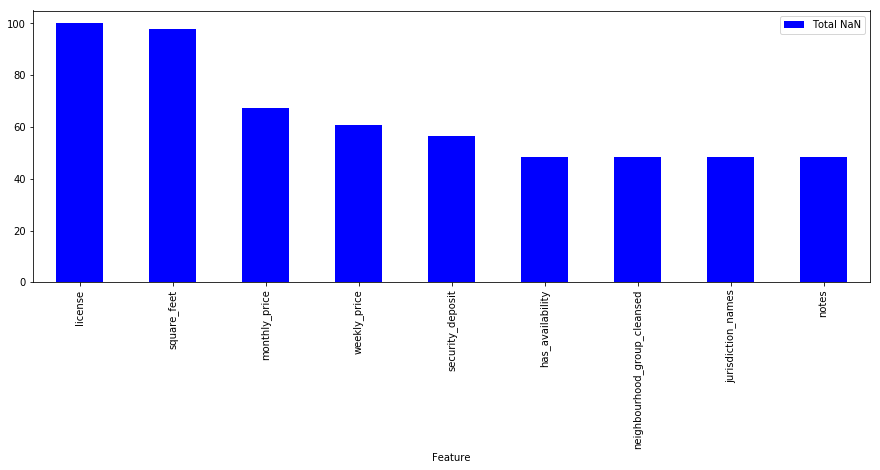

In [12]:
missings = missing_data(listing, 40)

0                         license
1                     square_feet
2                   monthly_price
3                    weekly_price
4                security_deposit
5                has_availability
6    neighbourhood_group_cleansed
7              jurisdiction_names
8                           notes
Name: Feature, dtype: object

0                         license
1                     square_feet
2                   monthly_price
3                    weekly_price
4                security_deposit
5                has_availability
6    neighbourhood_group_cleansed
7              jurisdiction_names
8                           notes
Name: Feature, dtype: object

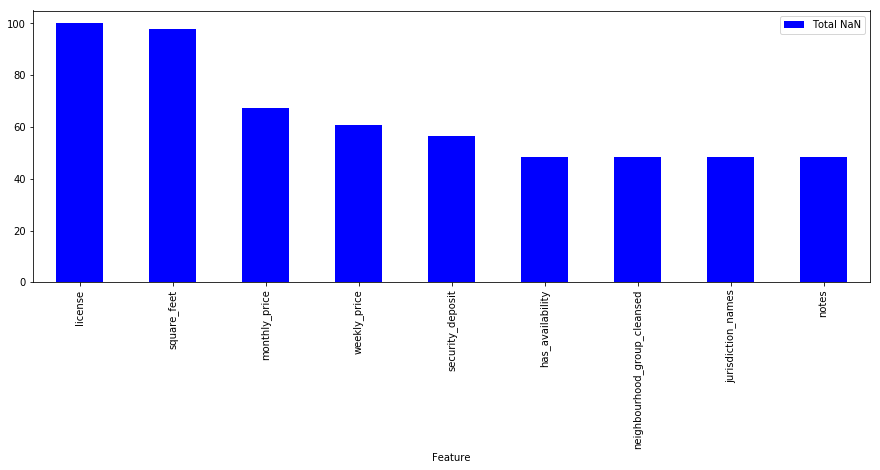

In [13]:
missings = missing_data(listing, 40)
drop_missings(listing,missings, 40)

As prices is the the target variable I don't dropout it

### Keep features to analyze


In [16]:
display(listing.head(1))

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...","The bus stop is 2 blocks away, and frequent. B...",https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,$35.00,1,$0.00,2,1125,2 weeks ago,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,moderate,f,f,1,NaN


Looking for remain nan column that might be are not necessary

In [17]:
display(listing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 83 columns):
id                                  7403 non-null int64
listing_url                         7403 non-null object
scrape_id                           7403 non-null int64
last_scraped                        7403 non-null object
name                                7403 non-null object
summary                             7083 non-null object
space                               5777 non-null object
description                         7403 non-null object
experiences_offered                 7403 non-null object
neighborhood_overview               4956 non-null object
transit                             5179 non-null object
thumbnail_url                       6484 non-null object
medium_url                          6484 non-null object
picture_url                         7403 non-null object
xl_picture_url                      6484 non-null object
host_id                             7403

None

#### Picking location variable

#### features selection

In [18]:
listing['calculated_host_listings_count'].max()

136

In [19]:
num_col = len(listing.columns)
listing = listing[[ 'price',
                    'last_scraped', 
                    'host_is_superhost',
                    'review_scores_value',
                    'host_since', 
                    'host_response_time', 
                    'host_response_rate', 
                    'host_acceptance_rate',
                    'host_listings_count',
                    'number_of_reviews',
                    'is_location_exact',
                    'property_type',
                    'neighbourhood_cleansed',
                    'room_type',
                    'accommodates',
                    'bathrooms',
                    'bedrooms',
                    'beds',
                    'bed_type',
                    'amenities',
                    'guests_included',
                    'extra_people',
                    'availability_30',
                    'availability_60',
                    'availability_90',
                    'availability_365',
                    'instant_bookable',
                    'cancellation_policy',
                    'require_guest_profile_picture',
                    'require_guest_phone_verification',
                    'reviews_per_month', 
                    'city'                
                  ]
                 ]


### Formatting



In [21]:
dollar_sign_list = ['price', 'extra_people']
percentage_sign_list = ['host_response_rate', 'host_acceptance_rate']

for col in dollar_sign_list:
    listing[col] = convert_to_number(listing, col, '$')
    
for col in percentage_sign_list:
    listing[col] = convert_to_number(listing, col, "%")

listing['host_type'] = np.where(listing['host_is_superhost'] == 't', 'Superhost', 'Normal')
listing['days_as_member'] = pd.to_datetime(listing['last_scraped']) - pd.to_datetime(listing['host_since'])

drop_list = ['host_is_superhost', 'last_scraped', 'host_since']

 


In [22]:
listing.drop(drop_list , axis=1, inplace=True)

### Handle Missing Values Rows



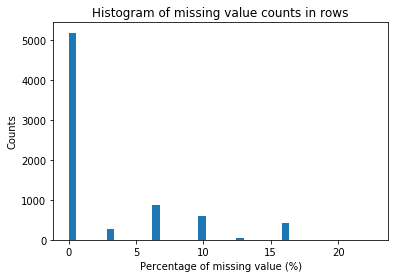

,count,weight,cumsum
"[0, 1)",5178,0.699446,0.699446
"[1, 2)",0,0.000000,0.699446
"[2, 3)",0,0.000000,0.699446
"[3, 4)",281,0.037958,0.737404
"[4, 5)",0,0.000000,0.737404
"[5, 6)",0,0.000000,0.737404
"[6, 7)",874,0.118060,0.855464
"[7, 8)",0,0.000000,0.855464
"[8, 10)",599,0.080913,0.936377
"[10, 15)",34,0.004593,0.940970


In [23]:
missings = (listing.isnull().sum(axis=1)/len(listing.columns)*100).sort_values(ascending=False)
plt.hist( missings[missings >= 0], bins=40)
plt.xlabel('Percentage of missing value (%)')
plt.ylabel('Counts')
plt.title('Histogram of missing value counts in rows')
plt.show()
#
bins = pd.cut(missings, [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 15, 20, 30, 50, 80], right = False)
agg = pd.DataFrame(missings, columns = ['missings']).groupby(bins)['missings'].agg(['count'])
agg['weight'] = agg['count']/len(missings)
agg['cumsum'] = agg['weight'].cumsum()
agg


In [24]:
print("Percentage of data if drop all NaN {0:.2f}%".format(100- len(listing.dropna())/len(listing)*100))

Percentage of data if drop all NaN 30.06%


In [25]:
listing.dropna(inplace=True)

### Categorical variables

In [26]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5178 entries, 1 to 7399
Data columns (total 31 columns):
price                               5178 non-null float64
review_scores_value                 5178 non-null float64
host_response_time                  5178 non-null object
host_response_rate                  5178 non-null float64
host_acceptance_rate                5178 non-null float64
host_listings_count                 5178 non-null float64
number_of_reviews                   5178 non-null int64
is_location_exact                   5178 non-null object
property_type                       5178 non-null object
neighbourhood_cleansed              5178 non-null object
room_type                           5178 non-null object
accommodates                        5178 non-null int64
bathrooms                           5178 non-null float64
bedrooms                            5178 non-null float64
beds                                5178 non-null float64
bed_type                        

In [27]:
l = listing['amenities'].str.strip('{}').str.split(',').values.tolist()
listing['amenities'] = listing['amenities'].str.strip('{}').str.split(',').values.tolist()
amnities_dummies = pd.get_dummies(listing['amenities'].apply(pd.Series).stack()).sum(level=0)
amnities_dummies[amnities_dummies == 0] = 'No'
amnities_dummies[amnities_dummies == 1] = 'Yes'
amnities_dummies.pop("")


listing.pop("amenities")
for col in amnities_dummies.columns:
    listing[col] = amnities_dummies[col]

## Modeling
We now have data that is cleaned and not missing values. But let's break our modeling to different phases:  

a) EDA  

b) Base Model  

c) Feature Selection  

d) Improved model  

### Univariate

#### Categoricals

In [28]:
category_features = listing.select_dtypes(include=['object']).columns
print(len(category_features))

57


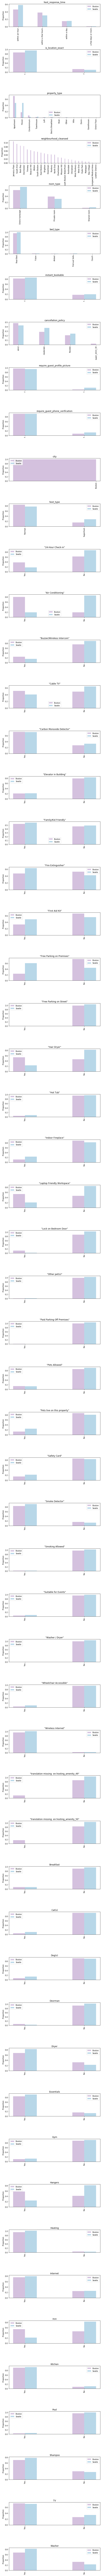

In [37]:
df = listing
plt.figure(figsize = [8,200])

rows = 57
cols = 1
count = 0
#ax, fig = plt.subplots(rows, cols)
palette = [sb.color_palette("Paired")[1], sb.color_palette("Paired")[0]]
column = category_features
len_boston = len(listing[listing['city'] == 'Boston'])
len_seattle = len(listing[listing['city'] == 'Boston'])
bar_width = 0.2
opacity = 0.8
for fig in range(rows*cols):
    
    #column = category_features[count]
    boston = listing.loc[listing['city'] == 'Boston', column[count]].value_counts()/len_boston
    seattle = listing.loc[listing['city'] == 'Seattle', column[count]].value_counts()/len_seattle
    n_groups = len(boston)
    index = np.arange(n_groups)
    
    if 'Yes' in boston.index:
        boston = boston.reindex(index = ['Yes', 'No'])
        seattle = seattle.reindex(index = ['Yes', 'No'])
    else:
        seattle = seattle.reindex(index = boston.index)
        
    plt.subplot(rows, cols, fig+1)
    
    rects1 = plt.bar(index, boston, bar_width,
                alpha = opacity,
                color=palette[0], 
                label='Boston')

    rects2 = plt.bar(index + bar_width, seattle, bar_width,
                alpha = opacity,
                color=palette[1], 
                label='Seatle')
    
    plt.ylabel('Proportion')
    plt.title(column[count])
    
    plt.xticks(index + bar_width/2, (boston.index))
    plt.xticks(rotation = 90)
    plt.legend()
    plt.tight_layout()
    plt.subplots_adjust(hspace = 1)
    count += 1
plt.show()


        


#### Numerical

In [38]:
numeric_variables = listing.select_dtypes(include=['float64', 'int64', 'timedelta64' ])
len(numeric_variables.columns)

18

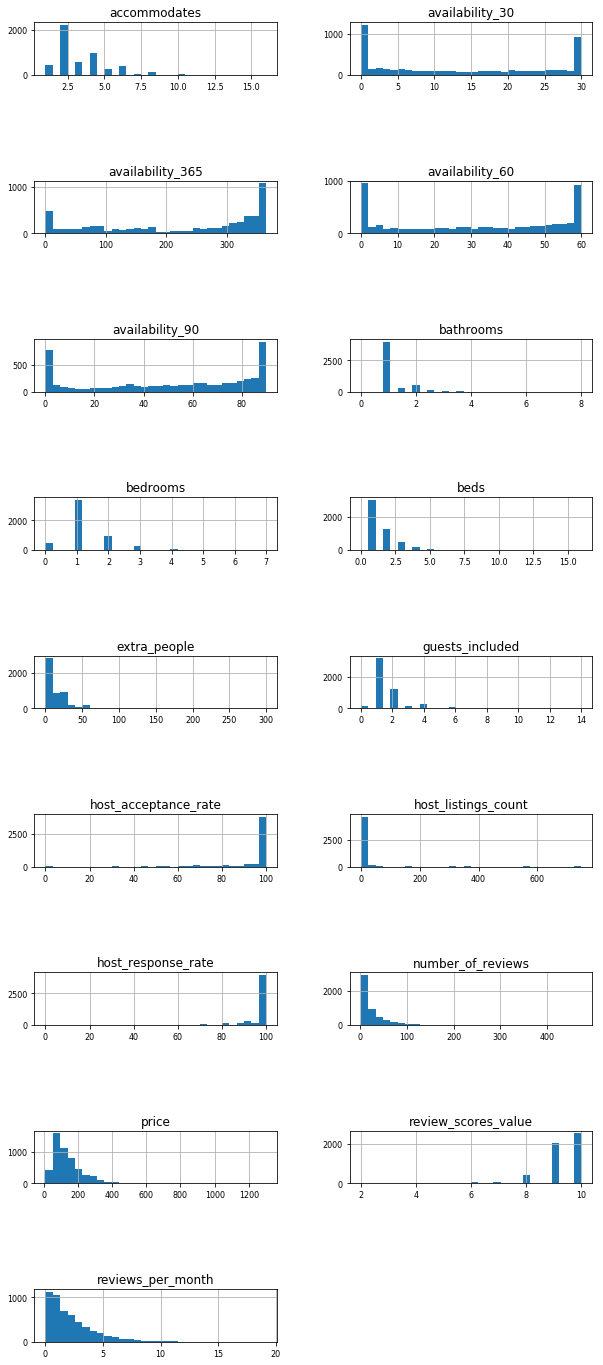

In [39]:

numeric_variables.hist(figsize = (10, 100),
                      bins=30, 
                      xlabelsize=8, 
                      ylabelsize=8, 
                      layout = (35, 2)
                      );
plt.subplots_adjust(hspace = 2);


#### Droping more feature

In [ ]:
def simple_boxplot(df, cat, num, label):
    base_color = sb.color_palette("Blues")[3]
    sb.violinplot(data = df,
              x = cat, y = num, 
              color = base_color, inner = 'quartile')
    plt.xticks(rotation = 90)
    plt.ylabel(label);
    plt.show();
simple_boxplot(df, 'host_type', 'price', 'Host type vs Price')    
# {“box”, “quartile”, “point”, “stick”, None}

## Deployment and Testing
We will deploy the model and test it on New York data. But if our assumption is that our model is general, we want to do the following:  

Use the most important features. This is to deploy a fast model.  

Remove host diff since it is asking for a variable found in listing which is a huge csv for New York for example`  

### PCA to looking clusters

In [40]:
listing['days_as_member'] = listing['days_as_member'].astype(int)

In [119]:

import numpy as np

threshold = 3

listing_dummies = pd.get_dummies(listing)
listing_dummies_boston = listing_dummies[listing_dummies['city_Boston']==1]
listing_dummies_boston = removing_outliers(listing_dummies_boston, 'price')


listing_dummies_seattle = listing_dummies[listing_dummies['city_Boston']==0]
listing_dummies_seattle = removing_outliers(listing_dummies_seattle, 'price')




#### Boston

In [140]:
scaler = RobustScaler()
df_std = scaler.fit_transform(listing_dummies_boston)

pca = PCA()
pca.fit(df_std)
pca_data = pca.transform(df_std)

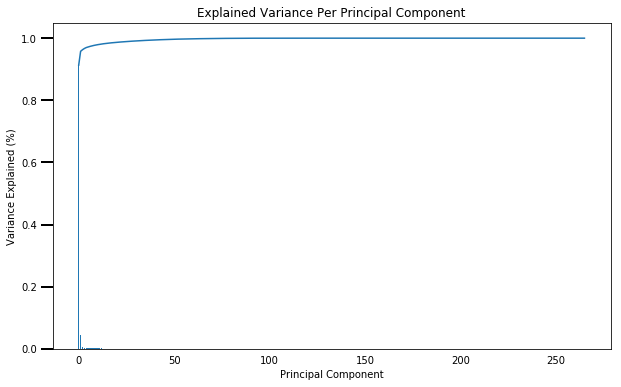

In [141]:
# Re-apply PCA to the data while selecting for number of components to retain.
scree_plot(pca)

In [142]:
pca = PCA(n_components=3)
pca.fit(df_std)
pca_data = pca.transform(df_std)

In [143]:
pca_boston = get_components(pca.components_, listing_dummies_seattle.columns, 2)

In [144]:
pca_boston["PCA 1"].sort_values(ascending=False).head(5)

host_listings_count    0.998801
availability_30        0.011872
price                  0.010649
Name: PCA 1, dtype: float64

In [146]:
pca_boston["PCA 1"].sort_values(ascending=True).head(5)

host_response_rate     -0.025233
host_acceptance_rate   -0.013274
number_of_reviews      -0.009166
Name: PCA 1, dtype: float64

#### Seattle

In [148]:
scaler = RobustScaler()
df_std = scaler.fit_transform(listing_dummies_seattle)
pca = PCA()
pca.fit(df_std)
pca_data = pca.transform(df_std)
pca = PCA(n_components=3)
pca.fit(df_std)
pca_data = pca.transform(df_std)

In [149]:
pca_seattle = get_components(pca.components_, listing_dummies_seattle.columns, 2)

In [150]:
pca_seattle["PCA 1"].sort_values(ascending=False).head(5)

host_listings_count    0.998794
accommodates           0.010529
beds                   0.009879
Name: PCA 1, dtype: float64

In [ ]:
pca_seattle["PCA 1"].sort_values(ascending=True).head(5)

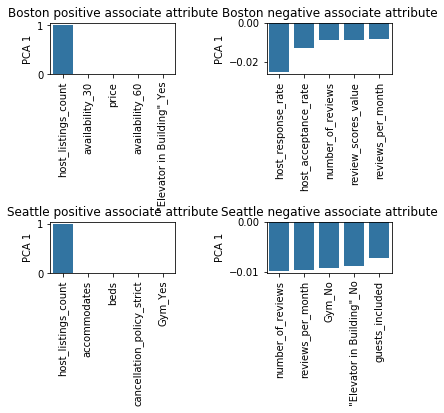

In [235]:
#plot side by side PCA_comps
ploting_main_pca_comp()

## Modeling

### Price

#### Boston

/Users/JamesAir/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RMSE: 0.342296


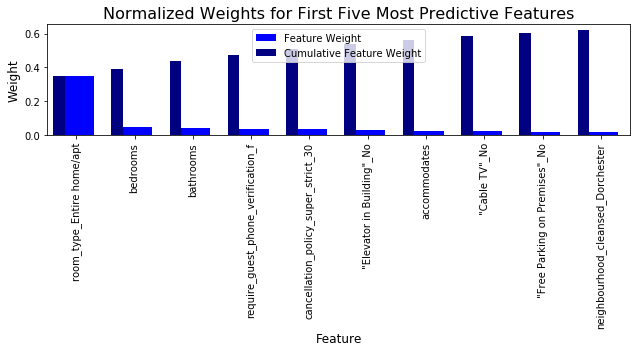

In [215]:
model_fit(df = listing_dummies,  city = 'Boston', target = 'price', outlier = 'price')

####  Seattle

/Users/JamesAir/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RMSE: 0.435707


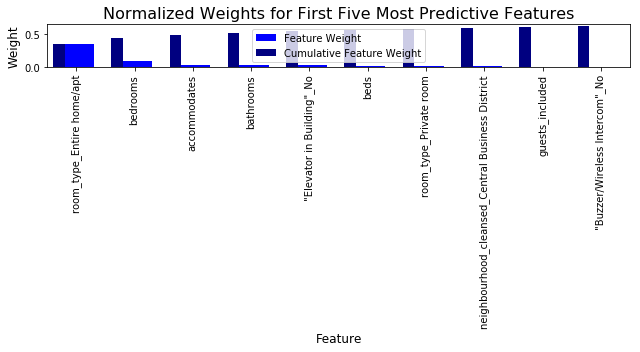

In [216]:
model_fit(df = listing_dummies,  city = 'Seattle', target = 'price', outlier = 'price')

### Review Score

####  Boston

Accuracy: 0.641548


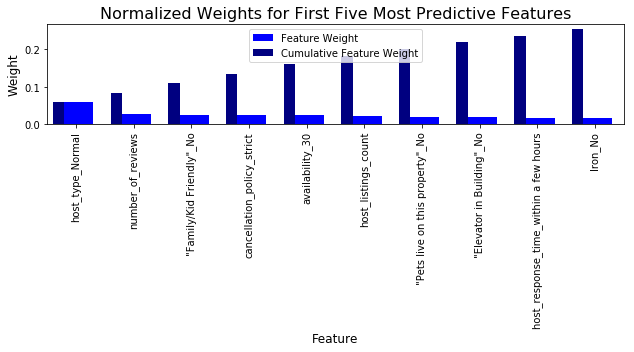

In [212]:
model_fit(df = listing_dummies,  city = 'Boston', 
          target = 'review_scores_value', 
          outlier = False, 
          classifier=True,
         )

####  Seattle

Accuracy: 0.657250


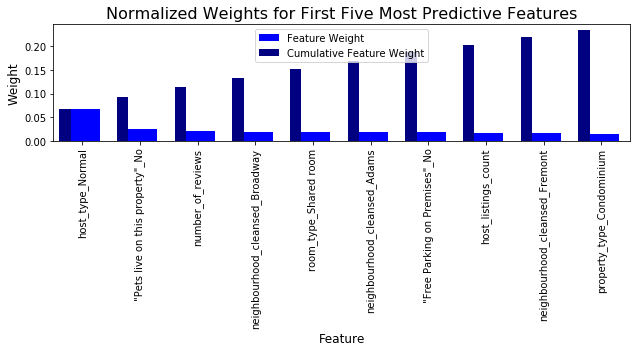

In [217]:
model_fit(df = listing_dummies,  city = 'Seattle', 
          target = 'review_scores_value', 
          outlier = False, 
          classifier=True,
         )

### Host Type

#### Boston

Accuracy: 0.881188


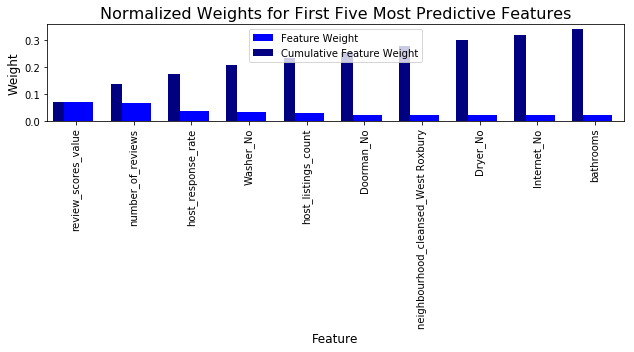

In [230]:
model_fit(df = listing_dummies,  city = 'Boston', 
          target = 'host_type_Superhost', 
          outlier = False,
          remove_features='host_type_Normal',
          classifier=True
         )

####  Seattle

Accuracy: 0.843691


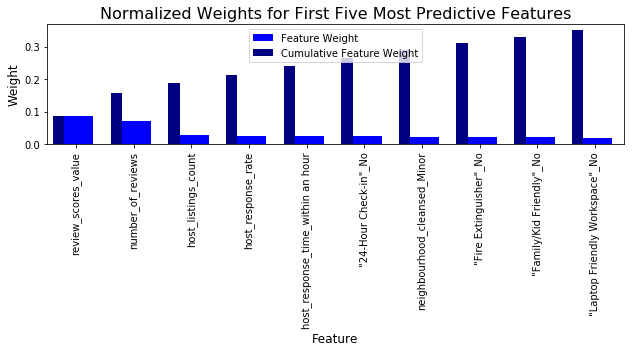

In [231]:
model_fit(df = listing_dummies,  city = 'Seattle', 
          target = 'host_type_Superhost', 
          outlier = False,
          remove_features='host_type_Normal',
          classifier=True
         )

**Business Understanding:** This data contain a lot of parameters related to Boston and Seattle Airbnb data. Airbnb is in the business of offering host locations for cutomers. Like Amazon, those hosts rely on price and review score. I am assuming that review score correlates with profitability.

**Data Understanding:** The data is very dirty but contain a lot of informative insights. So we are required to do a lot of data preprocessing with the data.

**Data cleaning and preprocessing:** I spent a lot of time on cleaning the data and you can see from the code that the majority of my work is on data processing. At first, I started by removing columns that are not needed to trim the matrix, then I started remvoing missing data, then removing null data, and then creating dummy variables for categorical columns.

**Analysis:** I created a heatmap to show the correlation of data and removed data that are strongly correlated with each other.

**Model:** I used a base model which is linear regression which performed poorly. Then, I used decision tree regressor. The model score is 99%.

**Deploy:** To deploy this model quickly, we need to neglict calender list since it is huge and rely on the 9 features that we have except host diff. Our model still give 99% accuracy for Boston and Seattle but does not give good results for New York and San Franscisco indicating that each city need its own model and that we need to aggregate data.